# Import Modul dan Load Data

In [23]:
%%time
import vaex
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


CPU times: total: 0 ns
Wall time: 0 ns


In [2]:
%%time

df_gabungan = vaex.from_csv('datagabungan.csv', convert=True, chunk_size=100_000)
df_gabungan

CPU times: total: 891 ms
Wall time: 2.92 s


#,id,dati2,typefaskes,usia,jenkel,pisat,jenispel,politujuan,diagfktp,biaya,jenispulang,kelasrawat,label,durasi_rawat,cbg1,cbg2,cbg3,diag,levelid,proc_code_clean
0,165666,17,KL,48,P,1.0,2,THT,Diseases of the skin and subcutaneous tissue,184300.0,1.0,3,0,0,Q,5,42,Diseases of the ear and mastoid process,1.0,--
1,166042,17,KL,53,P,1.0,2,INT,"Endocrine, nutritional and metabolic diseases",187300.0,1.0,3,0,0,Q,5,44,Diseases of the digestive system,2.0,--
2,168937,17,KL,54,P,1.0,2,MAT,Diseases of the eye and adnexa,187300.0,1.0,3,0,0,Q,5,44,Diseases of the eye and adnexa,2.0,--
3,1005899,17,A,53,P,1.0,2,SAR,Diseases of the musculoskeletal system,381600.0,1.0,3,0,0,Q,5,44,Diseases of the musculoskeletal system,1.0,--
4,51010,8,SD,50,P,1.0,2,IGD,Diseases of the blood and immune system,155000.0,2.0,3,0,0,Q,5,33,Diseases of the blood and immune system,1.0,--
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"9,694,493",10119418,299,C,0,L,4.0,2,ANA,Factors influencing health status,347400.0,1.0,3,0,0,L,3,11,Perinatal conditions,1.0,Operations On The Integumentary System
"9,694,494",6879116,115,KI,0,P,4.0,2,038,Perinatal conditions,395900.0,1.0,3,0,0,Q,5,44,Congenital malformations,2.0,--
"9,694,495",6682407,112,SC,0,L,4.0,2,ANA,Factors influencing health status,308800.0,1.0,3,0,0,P,9,17,Factors influencing health status,2.0,'Miscellaneous Diagnostic And Therapeutic Proced...
"9,694,496",8176456,169,SD,0,L,4.0,2,ANA,Perinatal conditions,182100.0,1.0,3,0,0,Q,5,42,Perinatal conditions,1.0,--


In [3]:
%%time

df_gabungan = df_gabungan.drop('id')


CPU times: total: 0 ns
Wall time: 0 ns


In [6]:
df_gabungan

#,dati2,typefaskes,usia,jenkel,pisat,jenispel,politujuan,diagfktp,biaya,jenispulang,kelasrawat,label,durasi_rawat,cbg1,cbg2,cbg3,diag,levelid,proc_code_clean
0,17,KL,48,P,1.0,2,THT,Diseases of the skin and subcutaneous tissue,184300.0,1.0,3,0,0,Q,5,42,Diseases of the ear and mastoid process,1.0,--
1,17,KL,53,P,1.0,2,INT,"Endocrine, nutritional and metabolic diseases",187300.0,1.0,3,0,0,Q,5,44,Diseases of the digestive system,2.0,--
2,17,KL,54,P,1.0,2,MAT,Diseases of the eye and adnexa,187300.0,1.0,3,0,0,Q,5,44,Diseases of the eye and adnexa,2.0,--
3,17,A,53,P,1.0,2,SAR,Diseases of the musculoskeletal system,381600.0,1.0,3,0,0,Q,5,44,Diseases of the musculoskeletal system,1.0,--
4,8,SD,50,P,1.0,2,IGD,Diseases of the blood and immune system,155000.0,2.0,3,0,0,Q,5,33,Diseases of the blood and immune system,1.0,--
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"9,694,493",299,C,0,L,4.0,2,ANA,Factors influencing health status,347400.0,1.0,3,0,0,L,3,11,Perinatal conditions,1.0,Operations On The Integumentary System
"9,694,494",115,KI,0,P,4.0,2,038,Perinatal conditions,395900.0,1.0,3,0,0,Q,5,44,Congenital malformations,2.0,--
"9,694,495",112,SC,0,L,4.0,2,ANA,Factors influencing health status,308800.0,1.0,3,0,0,P,9,17,Factors influencing health status,2.0,'Miscellaneous Diagnostic And Therapeutic Proced...
"9,694,496",169,SD,0,L,4.0,2,ANA,Perinatal conditions,182100.0,1.0,3,0,0,Q,5,42,Perinatal conditions,1.0,--


In [7]:
label_counts = df_gabungan['label'].value_counts()
label_counts

0    9451189
1     243309
dtype: int64

In [8]:
df_gabungan.describe()

,dati2,typefaskes,usia,jenkel,pisat,jenispel,politujuan,diagfktp,biaya,jenispulang,kelasrawat,label,durasi_rawat,cbg1,cbg2,cbg3,diag,levelid,proc_code_clean
data_type,int64,string,int64,string,float64,int64,string,string,float64,float64,int64,int64,int64,string,int64,int64,string,float64,string
count,9694498,9694498,9694498,9694498,9694498,9694498,9694498,9694498,9694498,9694498,9694498,9694498,9694498,9694498,9694498,9694498,9678306,9678306,4661257
NA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,16192,16192,5033241
mean,183.01691670883835,--,40.386917507229356,--,2.3663778155403197,1.988676360550077,--,--,490994.8447393563,1.0702532508645626,2.9923355495044714,0.025097637856029264,0.04467173029485384,--,4.406321296884068,31.777484300889018,--,1.2193323914329637,--
std,105.621825,--,22.077941,--,1.366217,0.105808,--,--,1682217.07817,0.462286,0.110646,0.156422,1.246833,--,1.02409,13.518591,--,0.413794,--
min,1,--,0,--,1.0,1,--,--,0.0,1.0,1,0,0,--,1,1,--,1.0,--
max,528,--,110,--,5.0,2,--,--,309451300.0,5.0,3,1,655,--,9,84,--,2.0,--


# Melihat Nilai Kosong Pada kolom Diag, levelid dan Proc_Code_Clean

## Hapus Baris Kosong

In [16]:
df_selected = df_gabungan['diag', 'levelid', 'proc_code_clean']


Frekuensi nilai unik di kolom: 'diag'
                                             diag  _count
0                  Diseases of the eye and adnexa  745609
1               Factors influencing health status  703950
2          Diseases of the musculoskeletal system  690376
3              Diseases of the circulatory system  670136
4          Symptoms, signs, and abnormal findings  653406
5         Diseases of the ear and mastoid process  606233
6                Diseases of the digestive system  577656
7                  Diseases of the nervous system  550651
8   Endocrine, nutritional and metabolic diseases  520765
9    Diseases of the skin and subcutaneous tissue  518130
10             Diseases of the respiratory system  510059
11           Diseases of the genitourinary system  500846
12               Mental and behavioural disorders  487455
13                     Injury and external causes  475181
14                                      Neoplasms  351546
15      Certain infectious and pa

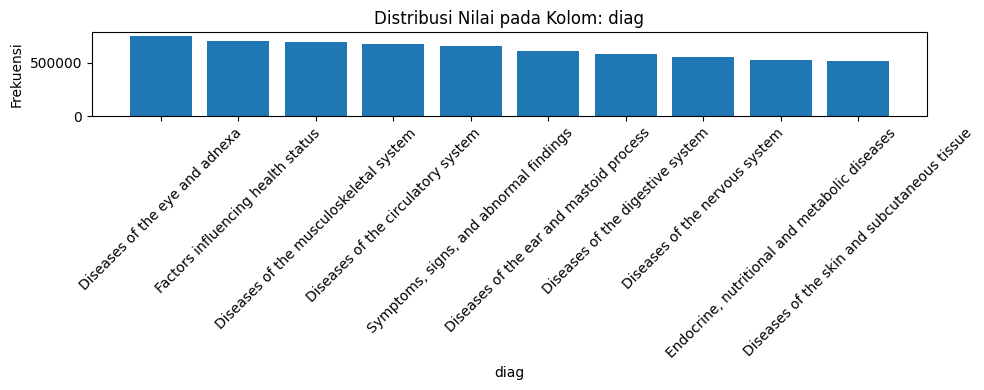


Frekuensi nilai unik di kolom: 'levelid'
   levelid   _count
0      1.0  7555540
1      2.0  2122766
2      NaN      388


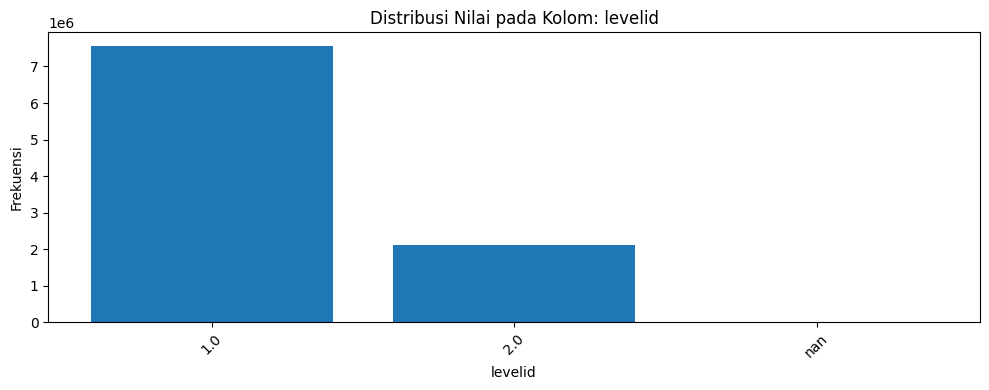


Frekuensi nilai unik di kolom: 'proc_code_clean'
                                      proc_code_clean   _count
0                                                None  5017437
1   Miscellaneous Diagnostic And Therapeutic Proce...  3817710
2             Operations On The Cardiovascular System   208951
3          Operations On The Nose, Mouth, And Pharynx   172618
4                               Operations On The Eye   144186
5              Operations On The Integumentary System   126849
6                               Operations On The Ear    64464
7            Operations On The Musculoskeletal System    42787
8                    Operations On The Urinary System    36929
9                              Obstetrical Procedures    12651
10               Operations On The Respiratory System     8300
11                   Operations On The Nervous System     7088
12                 Operations On The Digestive System     5775
13            Operations On The Female Genital Organs     5271
14   

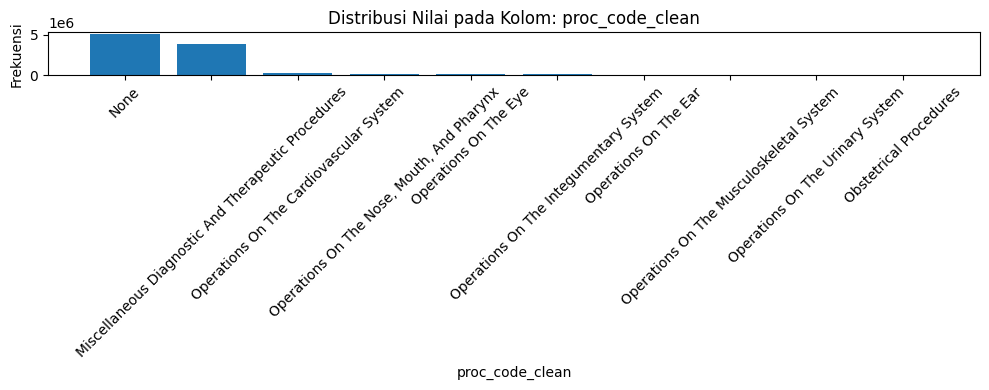


Frekuensi nilai unik di kolom: '__label'
    _count
0  9435385
1   243309


KeyError: '__label'

<Figure size 1000x400 with 0 Axes>

In [17]:
%%time

import matplotlib.pyplot as plt
from vaex import agg

for col in df_selected.column_names:
    print(f"\nFrekuensi nilai unik di kolom: '{col}'")
    
    # Group by dan hitung frekuensi
    result = df_selected.groupby(df_selected[col], agg.count()).sort(by='_count', ascending=False)
    
    # Konversi ke pandas untuk kemudahan visualisasi
    result_pd = result.to_pandas_df()
    
    print(result_pd)  # Cetak hasil

    # Jika terlalu banyak nilai unik, ambil 10 teratas agar grafiknya jelas
    top_n = 10
    top_result = result_pd.head(top_n)

    # Plot
    plt.figure(figsize=(10, 4))
    plt.bar(top_result[col].astype(str), top_result['_count'])
    plt.title(f'Distribusi Nilai pada Kolom: {col}')
    plt.xlabel(col)
    plt.ylabel('Frekuensi')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


### Diagnosa

In [4]:
%%time

df_gabungan[(df_gabungan['label'] == 0) & df_gabungan['diag'].isna()].count()


CPU times: total: 109 ms
Wall time: 254 ms


array(15804, dtype=int64)

In [5]:
# Drop baris data dengan Label== 0 dan diag  yang kosong
df_gabungan = df_gabungan[~((df_gabungan['label'] == 0) & df_gabungan['diag'].isna())]


In [6]:
%%time

df_gabungan[(df_gabungan['label'] == 1) & df_gabungan['diag'].isna()].count()


CPU times: total: 328 ms
Wall time: 120 ms


array(388, dtype=int64)

In [7]:
# Mengisi Data Kosong
## Diisi dengan Data Diagnosa yang paling Sedikit
df_gabungan['diag'] = df_gabungan['diag'].fillna('External causes of morbidity and mortality')


In [8]:
%%time

df_gabungan[(df_gabungan['label'] == 1) & df_gabungan['diag'].isna()].count()


CPU times: total: 344 ms
Wall time: 489 ms


array(0, dtype=int64)

In [9]:
label_counts = df_gabungan['label'].value_counts()
label_counts

0    9435385
1     243309
dtype: int64

### Level ID

In [10]:
%%time

df_gabungan[(df_gabungan['label'] == 0) & df_gabungan['levelid'].isna()].count()


CPU times: total: 391 ms
Wall time: 175 ms


array(0, dtype=int64)

In [11]:
%%time

df_gabungan[(df_gabungan['label'] == 1) & df_gabungan['levelid'].isna()].count()


CPU times: total: 219 ms
Wall time: 82.5 ms


array(388, dtype=int64)

In [12]:
# Mengisi Data Kosong
## Diisi dengan Data Diagnosa yang paling Sedikit
df_gabungan['levelid'] = df_gabungan['levelid'].fillna(2.0)


In [13]:
%%time

df_gabungan[(df_gabungan['label'] == 1) & df_gabungan['levelid'].isna()].count()


CPU times: total: 188 ms
Wall time: 119 ms


array(0, dtype=int64)

In [14]:
label_counts = df_gabungan['label'].value_counts()
label_counts

0    9435385
1     243309
dtype: int64

### Procedure

In [15]:
%%time

df_gabungan[(df_gabungan['label'] == 0) & df_gabungan['proc_code_clean'].isna()].count()


CPU times: total: 344 ms
Wall time: 160 ms


array(4917359, dtype=int64)

In [16]:
# Drop baris data dengan Label== 0 dan Procedure  yang kosong
df_gabungan = df_gabungan[~((df_gabungan['label'] == 0) & df_gabungan['proc_code_clean'].isna())]


In [17]:
%%time

df_gabungan[(df_gabungan['label'] == 1) & df_gabungan['proc_code_clean'].isna()].count()


CPU times: total: 406 ms
Wall time: 139 ms


array(100078, dtype=int64)

In [18]:
# Mengisi Data Kosong
## Diisi dengan Data Procedure terbanyak kedua
df_gabungan['proc_code_clean'] = df_gabungan['proc_code_clean'].fillna('Operations On The Cardiovascular System')




In [19]:
label_counts = df_gabungan['label'].value_counts()
label_counts

0    4518026
1     243309
dtype: int64

In [20]:
df_gabungan.describe()

,dati2,typefaskes,usia,jenkel,pisat,jenispel,politujuan,diagfktp,biaya,jenispulang,kelasrawat,label,durasi_rawat,cbg1,cbg2,cbg3,diag,levelid,proc_code_clean
data_type,int64,string,int64,string,float64,int64,string,string,float64,float64,int64,int64,int64,string,int64,int64,string,float64,string
count,4761335,4761335,4761335,4761335,4761335,4761335,4761335,4761335,4761335,4761335,4761335,4761335,4761335,4761335,4761335,4761335,4761335,4761335,4761335
NA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
mean,192.4577293973224,--,41.03976909837262,--,2.336876737301618,1.9769543625894839,--,--,634811.2200168651,1.074583493915047,2.984405424108995,0.05110100423515674,0.09084195924042311,--,3.767859644406453,24.61473305280977,--,1.221981650104435,--
std,105.103451,--,21.565326,--,1.357823,0.150048,--,--,2171739.724066,0.481313,0.157433,0.220204,1.776704,--,1.108001,13.101147,--,0.415579,--
min,1,--,0,--,1.0,1,--,--,0.0,1.0,1,0,0,--,1,1,--,1.0,--
max,528,--,110,--,5.0,2,--,--,309451300.0,5.0,3,1,655,--,9,84,--,2.0,--


In [21]:
# Data Yang Tidak Ada Baris Kosong
df_gabungan.export_csv("DataGabungan2.csv")

# Melihat Persebaran Data

In [48]:
%%time
df_gabungan2 = vaex.from_csv("DataGabungan2.csv", convert=True, chunk_size=100_000)
df_gabungan2

CPU times: total: 15.6 ms
Wall time: 87.7 ms


#,dati2,typefaskes,usia,jenkel,pisat,jenispel,politujuan,diagfktp,biaya,jenispulang,kelasrawat,label,durasi_rawat,cbg1,cbg2,cbg3,diag,levelid,proc_code_clean
0,17,KI,46,P,1.0,2,IGD,Diseases of the digestive system,186800.0,1.0,3,0,0,Q,5,42,Certain infectious and parasitic diseases,1.0,'Miscellaneous Diagnostic And Therapeutic Proced...
1,17,B,60,L,1.0,2,GND,Diseases of the digestive system,211400.0,1.0,3,0,0,Q,5,12,Diseases of the digestive system,1.0,'Miscellaneous Diagnostic And Therapeutic Proced...
2,17,B,15,L,4.0,2,IRM,Diseases of the musculoskeletal system,114400.0,1.0,3,0,0,M,3,16,Diseases of the musculoskeletal system,1.0,'Miscellaneous Diagnostic And Therapeutic Proced...
3,17,A,37,P,1.0,2,IGD,Diseases of the respiratory system,479000.0,1.0,3,0,0,J,3,13,Diseases of the respiratory system,1.0,'Miscellaneous Diagnostic And Therapeutic Proced...
4,17,I2,51,P,3.0,2,SAR,"Symptoms, signs, and abnormal findings",571000.0,1.0,3,0,0,Z,3,23,Diseases of the genitourinary system,1.0,'Miscellaneous Diagnostic And Therapeutic Proced...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"4,761,330",50,SC,0,P,4.0,2,ANA,Perinatal conditions,333800.0,1.0,3,0,0,I,3,13,Perinatal conditions,1.0,'Miscellaneous Diagnostic And Therapeutic Proced...
"4,761,331",179,A,0,P,4.0,2,038,"Symptoms, signs, and abnormal findings",425800.0,1.0,3,0,0,U,3,14,Perinatal conditions,1.0,'Miscellaneous Diagnostic And Therapeutic Proced...
"4,761,332",179,A,0,P,4.0,2,038,"Symptoms, signs, and abnormal findings",425800.0,1.0,3,0,0,U,3,14,Diseases of the ear and mastoid process,2.0,'Miscellaneous Diagnostic And Therapeutic Proced...
"4,761,333",299,C,0,L,4.0,2,ANA,Factors influencing health status,347400.0,1.0,3,0,0,L,3,11,Perinatal conditions,1.0,Operations On The Integumentary System


## Dati2

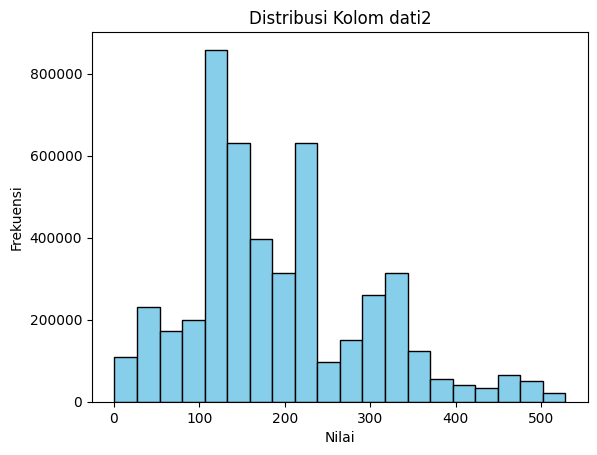

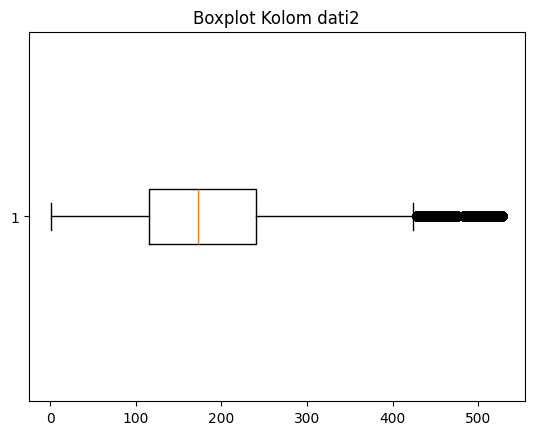

In [25]:
# Histogram
plt.hist(df_gabungan2['dati2'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribusi Kolom dati2')
plt.xlabel('Nilai')
plt.ylabel('Frekuensi')
plt.show()

# Boxplot untuk mendeteksi outlier
plt.boxplot(df_gabungan2['dati2'], vert=False)
plt.title('Boxplot Kolom dati2')
plt.show()

## Tipe Faskes

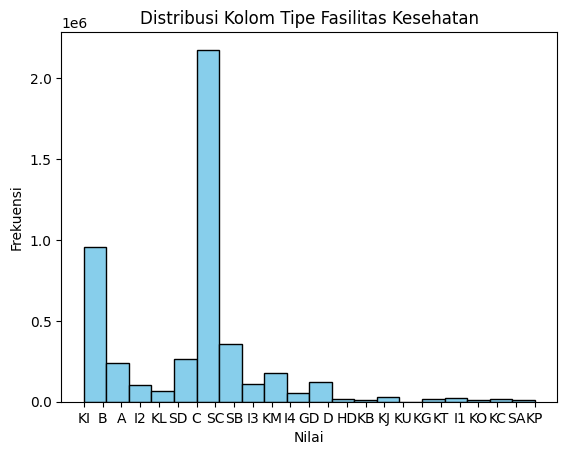

In [26]:
# Histogram
plt.hist(df_gabungan2['typefaskes'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribusi Kolom Tipe Fasilitas Kesehatan')
plt.xlabel('Nilai')
plt.ylabel('Frekuensi')
plt.show()


## Usia

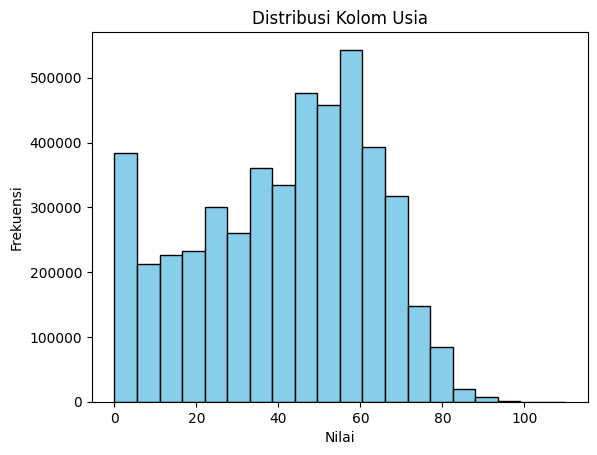

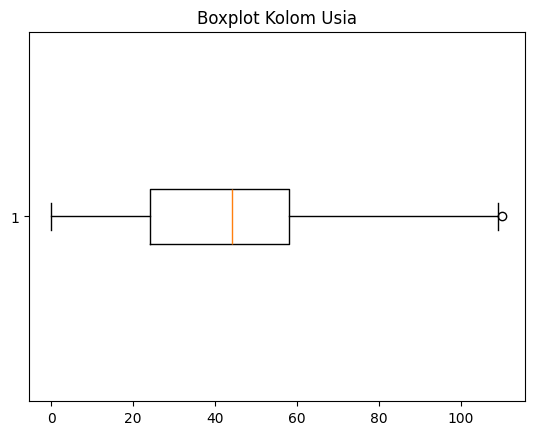

In [28]:
# Histogram
plt.hist(df_gabungan2['usia'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribusi Kolom Usia')
plt.xlabel('Nilai')
plt.ylabel('Frekuensi')
plt.show()

# Boxplot untuk mendeteksi outlier
plt.boxplot(df_gabungan2['usia'], vert=False)
plt.title('Boxplot Kolom Usia')
plt.show()

## Poli Tujuan


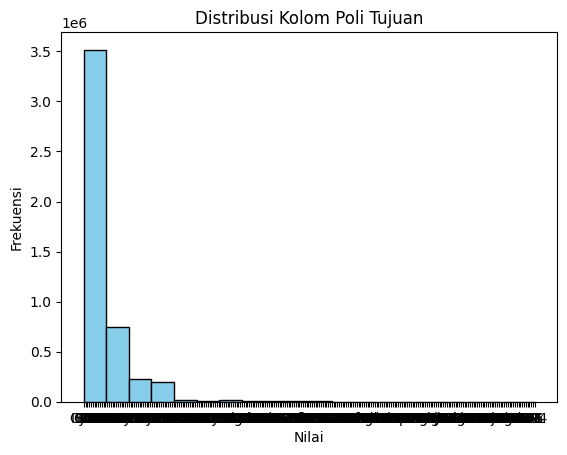

In [30]:
# Histogram
plt.hist(df_gabungan2['politujuan'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribusi Kolom Poli Tujuan')
plt.xlabel('Nilai')
plt.ylabel('Frekuensi')
plt.show()


## Biaya

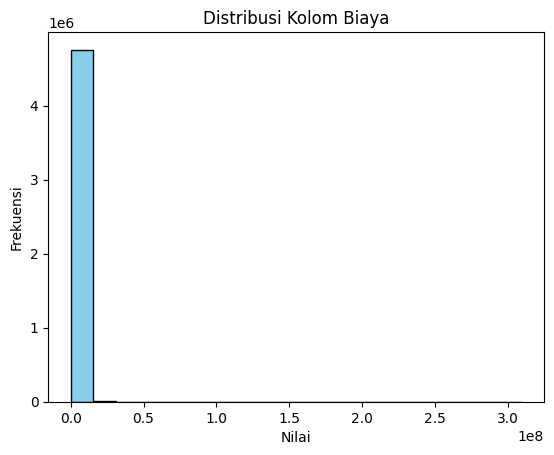

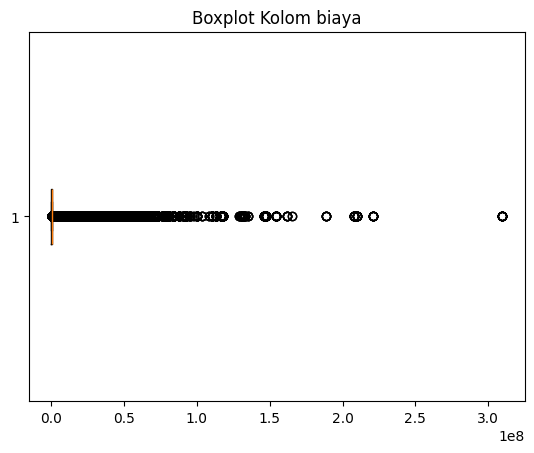

In [31]:

# Histogram
plt.hist(df_gabungan['biaya'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribusi Kolom Biaya')
plt.xlabel('Nilai')
plt.ylabel('Frekuensi')
plt.show()

# Boxplot untuk mendeteksi outlier
plt.boxplot(df_gabungan['biaya'], vert=False)
plt.title('Boxplot Kolom biaya')
plt.show()


# Jumlah Unique Value Setiap Kolom

In [36]:
df_selected2 = df_gabungan2['dati2', 'typefaskes', 'usia', 'jenkel', 'pisat', 'jenispel', 'politujuan', 'diagfktp', 'biaya', 'jenispulang', 'kelasrawat', 'label', 'durasi_rawat', 'cbg1', 'cbg2', 'cbg3', 'diag', 'levelid', 'proc_code_clean']


Frekuensi nilai unik di kolom: 'dati2'
     dati2  _count
0      113  180326
1      342  148590
2      217  126195
3      115   92850
4       38   92000
..     ...     ...
483    490      48
484    503      46
485    517      23
486    527      11
487    366       1

[488 rows x 2 columns]


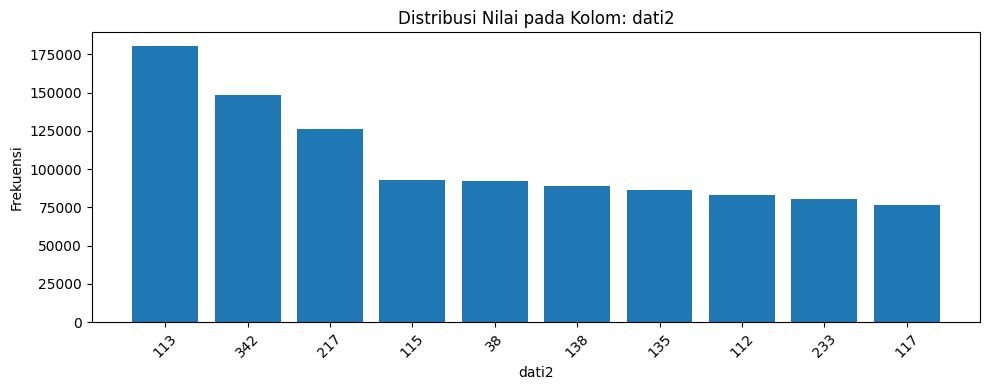


Frekuensi nilai unik di kolom: 'typefaskes'
   typefaskes   _count
0          SC  1221201
1           C   953630
2           B   897471
3          SB   358833
4          SD   261282
5           A   241353
6          KM   179233
7           D   117852
8          I3   108426
9          I2   105587
10         KL    64265
11         KI    56272
12         I4    54710
13         KJ    27641
14         I1    21445
15         KC    18211
16         HD    14931
17         KO    13478
18         KG    12952
19         KB    10060
20         KP     6944
21         SA     6709
22         GD     4010
23         KT     3744
24         KU     1095


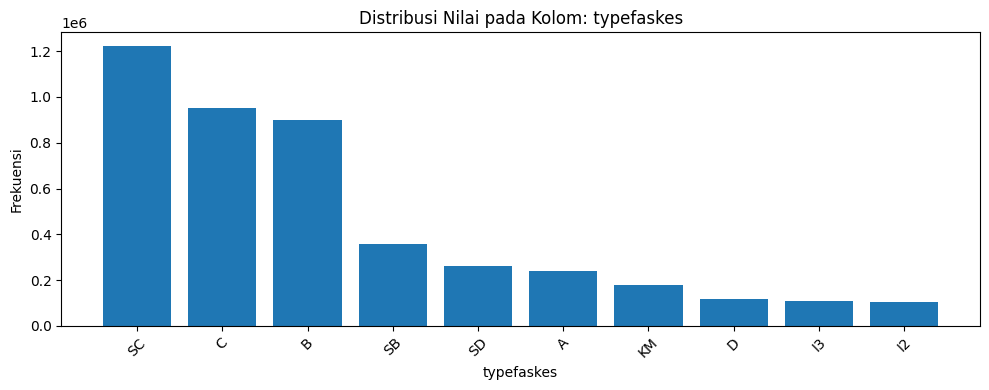


Frekuensi nilai unik di kolom: 'usia'
     usia  _count
0       0  117882
1      54   94529
2      53   93053
3      55   92596
4      59   92201
..    ...     ...
105   106       6
106   107       6
107   104       5
108   109       1
109   110       1

[110 rows x 2 columns]


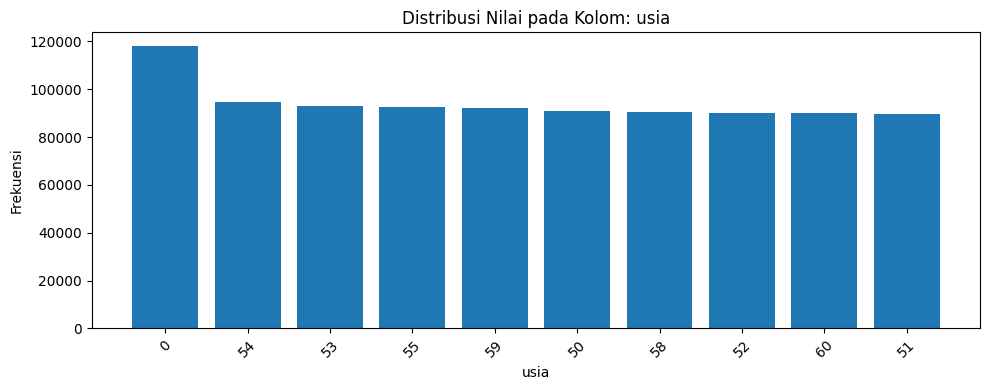


Frekuensi nilai unik di kolom: 'jenkel'
  jenkel   _count
0      P  2583526
1      L  2177809


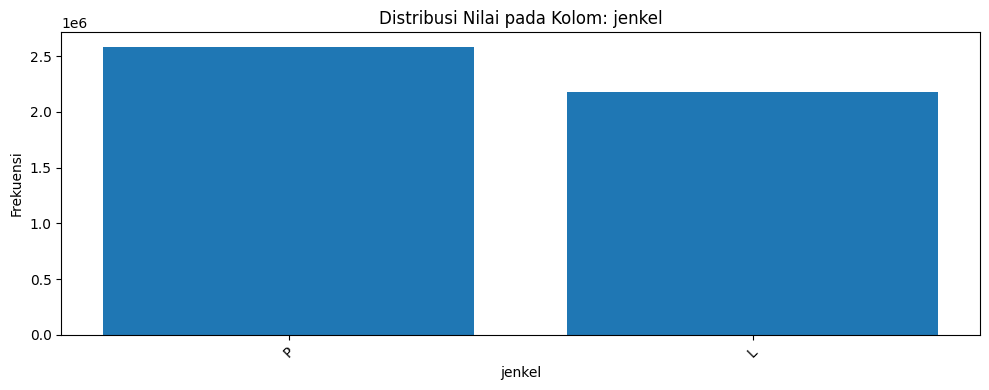


Frekuensi nilai unik di kolom: 'pisat'
   pisat   _count
0    1.0  2242239
1    3.0  1115875
2    4.0  1115209
3    5.0   166643
4    2.0   121369


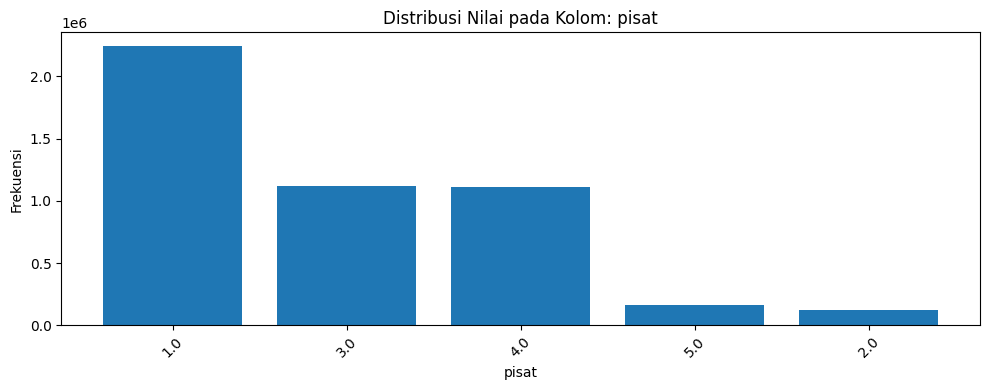


Frekuensi nilai unik di kolom: 'jenispel'
   jenispel   _count
0         2  4651607
1         1   109728


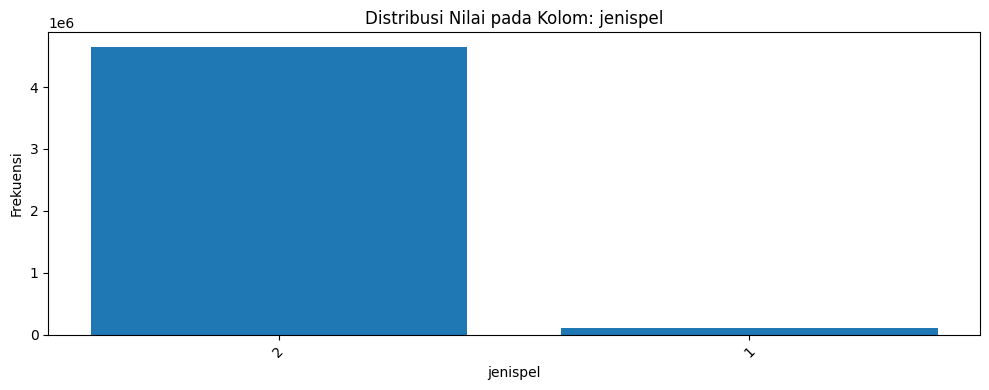


Frekuensi nilai unik di kolom: 'politujuan'
    politujuan  _count
0          IGD  940400
1          MAT  537142
2          INT  529631
3          THT  427669
4          IRM  281780
..         ...     ...
247        044       1
248        CAP       1
249        055       1
250        165       1
251        ugd       1

[252 rows x 2 columns]


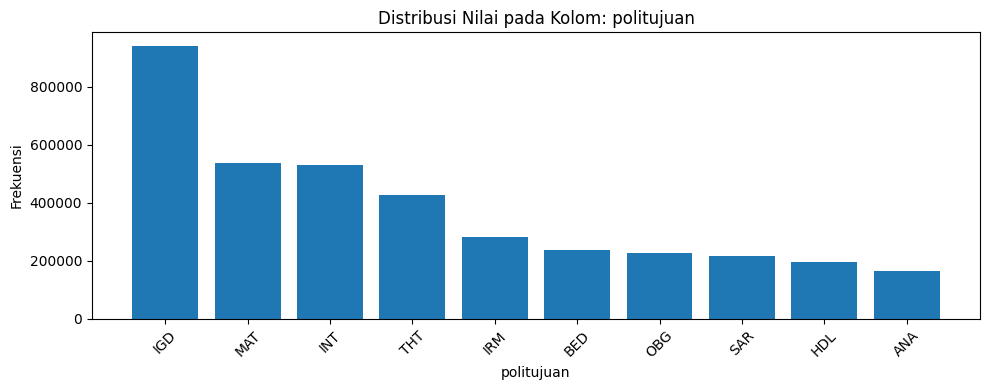


Frekuensi nilai unik di kolom: 'diagfktp'
                                         diagfktp  _count
0               Factors influencing health status  649501
1                  Diseases of the eye and adnexa  485532
2            Diseases of the genitourinary system  372784
3         Diseases of the ear and mastoid process  338510
4          Symptoms, signs, and abnormal findings  318795
5                Diseases of the digestive system  308537
6          Diseases of the musculoskeletal system  302497
7                      Injury and external causes  286106
8              Diseases of the circulatory system  270999
9   Endocrine, nutritional and metabolic diseases  211919
10               Mental and behavioural disorders  191850
11             Diseases of the respiratory system  186387
12                                      Neoplasms  182417
13                 Diseases of the nervous system  134529
14        Diseases of the blood and immune system  125817
15      Certain infectious an

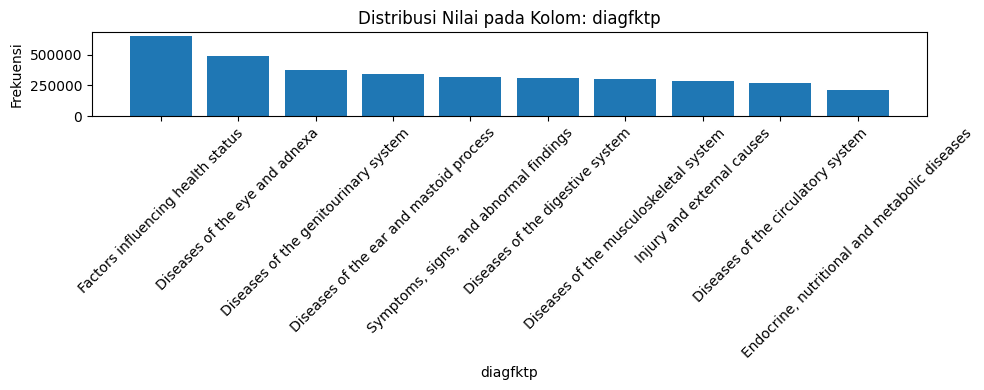


Frekuensi nilai unik di kolom: 'biaya'
           biaya  _count
0       190400.0  168936
1       183300.0   94391
2      2147000.0   75809
3       183500.0   70672
4       112800.0   70461
...          ...     ...
13685  7289300.0       1
13686  2423700.0       1
13687  7622700.0       1
13688  4311500.0       1
13689  5393000.0       1

[13690 rows x 2 columns]


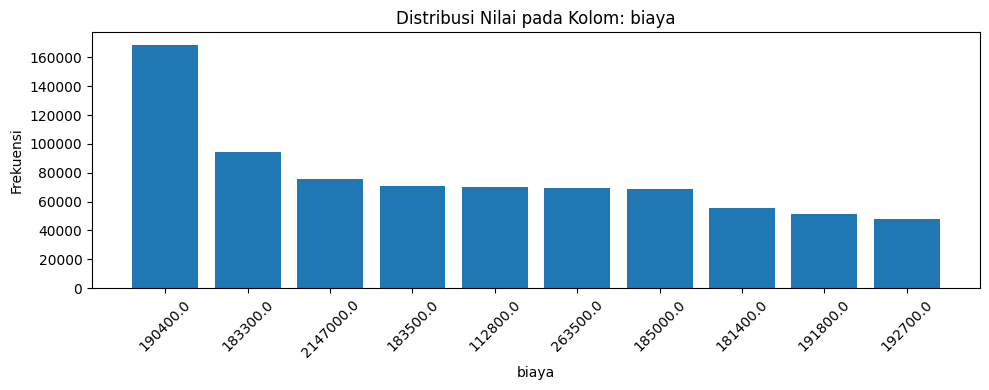


Frekuensi nilai unik di kolom: 'jenispulang'
   jenispulang   _count
0          1.0  4614335
1          2.0    65235
2          5.0    52727
3          4.0    20898
4          3.0     8140


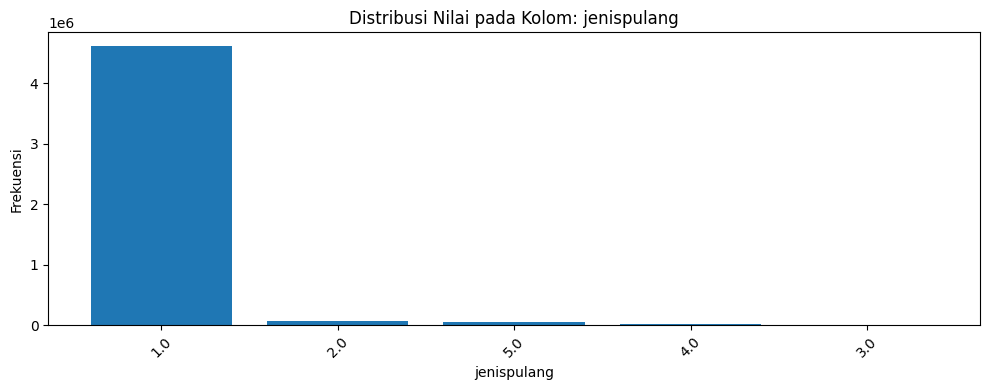


Frekuensi nilai unik di kolom: 'kelasrawat'
   kelasrawat   _count
0           3  4709543
1           2    29333
2           1    22459


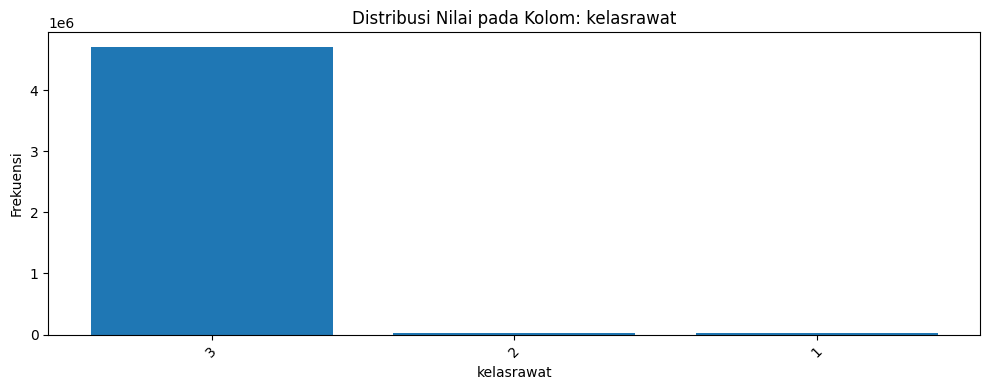


Frekuensi nilai unik di kolom: 'label'
   label   _count
0      0  4518026
1      1   243309


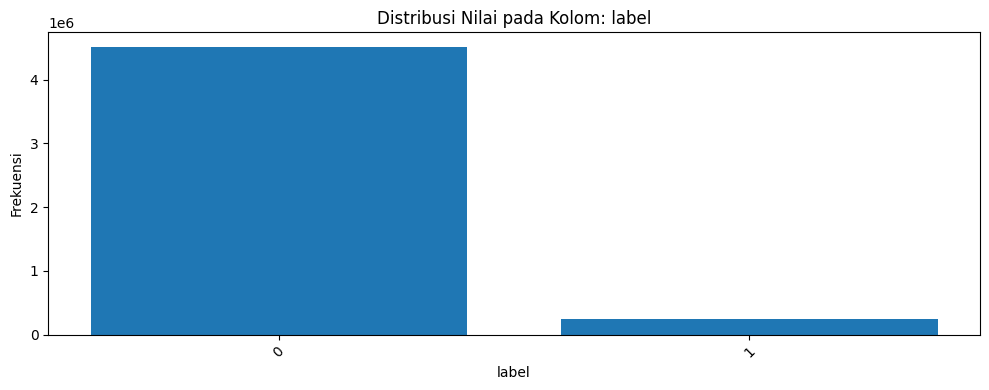


Frekuensi nilai unik di kolom: 'durasi_rawat'
     durasi_rawat   _count
0               0  4656442
1               2    29295
2               1    19975
3               3    19702
4               4    11062
..            ...      ...
123           464        1
124           184        1
125            84        1
126           327        1
127           177        1

[128 rows x 2 columns]


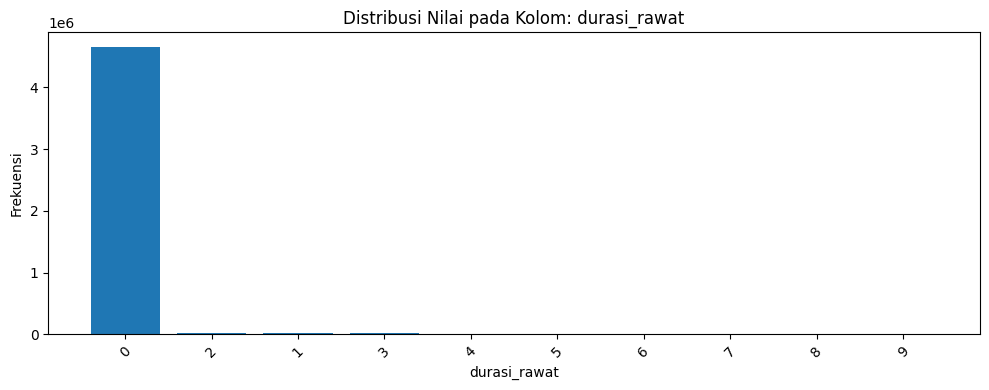


Frekuensi nilai unik di kolom: 'cbg1'
   cbg1   _count
0     Q  1531571
1     Z   716175
2     U   546790
3     H   431056
4     M   295902
5     N   276373
6     J   216910
7     F   185081
8     L   171728
9     D    99150
10    K    86907
11    I    67312
12    G    51458
13    P    35428
14    C    13692
15    W    12397
16    O    10181
17    E     7029
18    A     2984
19    V     1488
20    B     1294
21    S      386
22    T       43


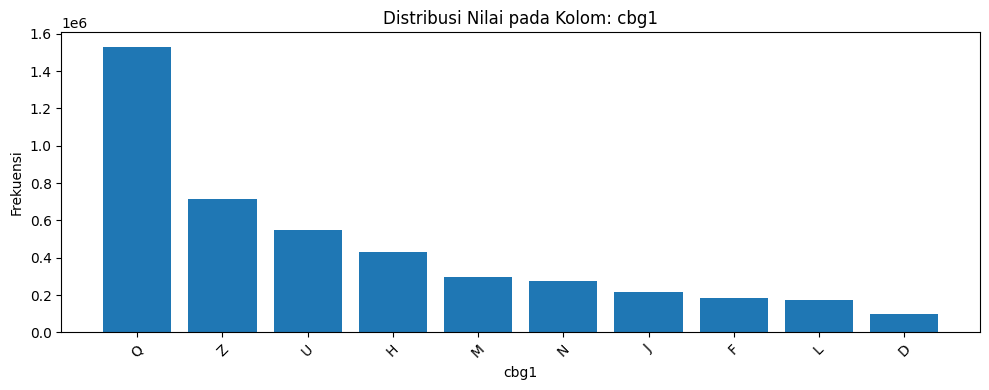


Frekuensi nilai unik di kolom: 'cbg2'
   cbg2   _count
0     3  2656320
1     5  1808849
2     2   175931
3     4    48444
4     1    26182
5     8    26108
6     9     9320
7     6     8994
8     7     1187


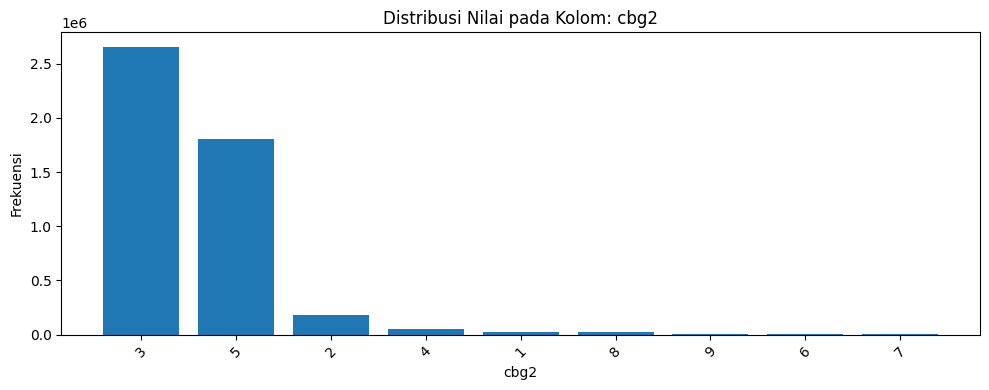


Frekuensi nilai unik di kolom: 'cbg3'
    cbg3  _count
0     44  903352
1     12  574922
2     15  523333
3     16  437076
4     13  358856
..   ...     ...
56    65      52
57    81      51
58    64      28
59    72      24
60    61       1

[61 rows x 2 columns]


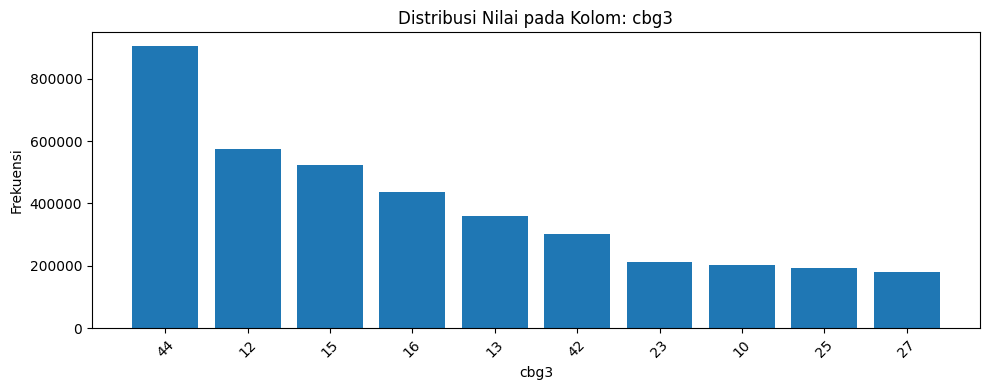


Frekuensi nilai unik di kolom: 'diag'
                                             diag  _count
0                  Diseases of the eye and adnexa  471409
1         Diseases of the ear and mastoid process  371995
2               Factors influencing health status  364429
3            Diseases of the genitourinary system  354637
4          Diseases of the musculoskeletal system  327446
5                      Injury and external causes  313415
6                Diseases of the digestive system  312188
7          Symptoms, signs, and abnormal findings  268691
8              Diseases of the circulatory system  260052
9              Diseases of the respiratory system  239905
10               Mental and behavioural disorders  215365
11  Endocrine, nutritional and metabolic diseases  211018
12                 Diseases of the nervous system  195267
13                                      Neoplasms  181397
14        Diseases of the blood and immune system  149035
15   Diseases of the skin and sub

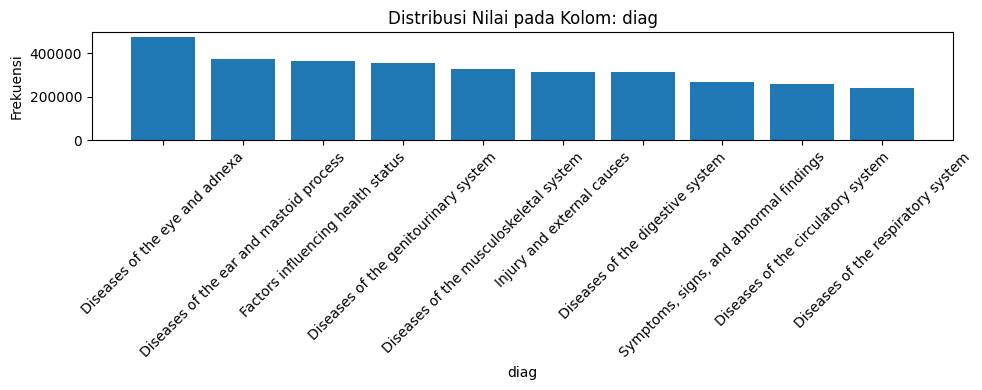


Frekuensi nilai unik di kolom: 'levelid'
   levelid   _count
0      1.0  3704406
1      2.0  1056929


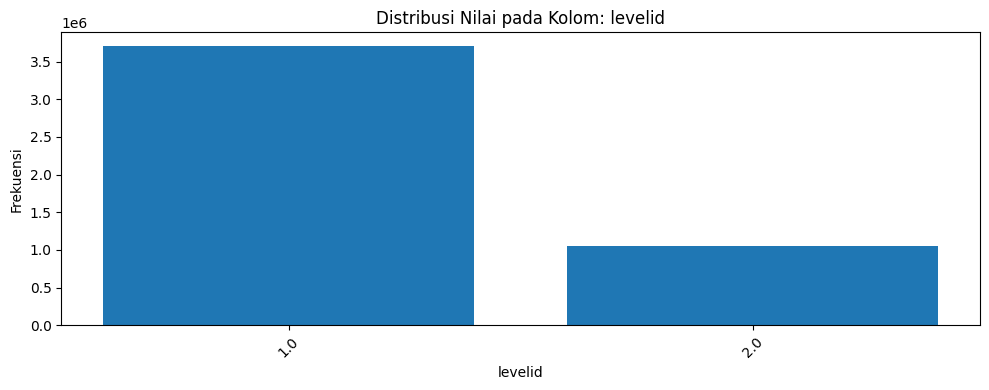


Frekuensi nilai unik di kolom: 'proc_code_clean'
                                      proc_code_clean   _count
0   Miscellaneous Diagnostic And Therapeutic Proce...  3817710
1             Operations On The Cardiovascular System   309029
2          Operations On The Nose, Mouth, And Pharynx   172618
3                               Operations On The Eye   144186
4              Operations On The Integumentary System   126849
5                               Operations On The Ear    64464
6            Operations On The Musculoskeletal System    42787
7                    Operations On The Urinary System    36929
8                              Obstetrical Procedures    12651
9                Operations On The Respiratory System     8300
10                   Operations On The Nervous System     7088
11                 Operations On The Digestive System     5775
12            Operations On The Female Genital Organs     5271
13       Operations On The Hemic And Lymphatic System     2692
14   

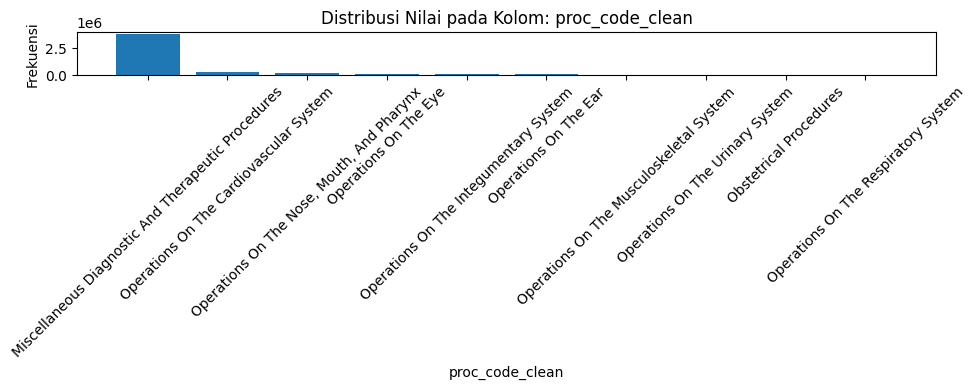

CPU times: total: 20 s
Wall time: 12.4 s


In [34]:
%%time

import matplotlib.pyplot as plt
from vaex import agg

for col in df_selected2.column_names:
    print(f"\nFrekuensi nilai unik di kolom: '{col}'")
    
    # Group by dan hitung frekuensi
    result = df_selected2.groupby(df_selected2[col], agg.count()).sort(by='_count', ascending=False)
    
    # Konversi ke pandas untuk kemudahan visualisasi
    result_pd = result.to_pandas_df()
    
    print(result_pd)  # Cetak hasil

    # Jika terlalu banyak nilai unik, ambil 10 teratas agar grafiknya jelas
    top_n = 10
    top_result = result_pd.head(top_n)

    # Plot
    plt.figure(figsize=(10, 4))
    plt.bar(top_result[col].astype(str), top_result['_count'])
    plt.title(f'Distribusi Nilai pada Kolom: {col}')
    plt.xlabel(col)
    plt.ylabel('Frekuensi')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


In [35]:
df_gabungan2.describe()

,dati2,typefaskes,usia,jenkel,pisat,jenispel,politujuan,diagfktp,biaya,jenispulang,kelasrawat,label,durasi_rawat,cbg1,cbg2,cbg3,diag,levelid,proc_code_clean
data_type,int64,string,int64,string,float64,int64,string,string,float64,float64,int64,int64,int64,string,int64,int64,string,float64,string
count,4761335,4761335,4761335,4761335,4761335,4761335,4761335,4761335,4761335,4761335,4761335,4761335,4761335,4761335,4761335,4761335,4761335,4761335,4761335
NA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
mean,192.4577293973224,--,41.03976909837262,--,2.336876737301618,1.9769543625894839,--,--,634811.2200168651,1.074583493915047,2.984405424108995,0.05110100423515674,0.09084195924042311,--,3.767859644406453,24.61473305280977,--,1.221981650104435,--
std,105.103451,--,21.565326,--,1.357823,0.150048,--,--,2171739.724066,0.481313,0.157433,0.220204,1.776704,--,1.108001,13.101147,--,0.415579,--
min,1,--,0,--,1.0,1,--,--,0.0,1.0,1,0,0,--,1,1,--,1.0,--
max,528,--,110,--,5.0,2,--,--,309451300.0,5.0,3,1,655,--,9,84,--,2.0,--


In [38]:
df_gabungan2

#,dati2,typefaskes,usia,jenkel,pisat,jenispel,politujuan,diagfktp,biaya,jenispulang,kelasrawat,label,durasi_rawat,cbg1,cbg2,cbg3,diag,levelid,proc_code_clean
0,17,KI,46,P,1.0,2,IGD,Diseases of the digestive system,186800.0,1.0,3,0,0,Q,5,42,Certain infectious and parasitic diseases,1.0,'Miscellaneous Diagnostic And Therapeutic Proced...
1,17,B,60,L,1.0,2,GND,Diseases of the digestive system,211400.0,1.0,3,0,0,Q,5,12,Diseases of the digestive system,1.0,'Miscellaneous Diagnostic And Therapeutic Proced...
2,17,B,15,L,4.0,2,IRM,Diseases of the musculoskeletal system,114400.0,1.0,3,0,0,M,3,16,Diseases of the musculoskeletal system,1.0,'Miscellaneous Diagnostic And Therapeutic Proced...
3,17,A,37,P,1.0,2,IGD,Diseases of the respiratory system,479000.0,1.0,3,0,0,J,3,13,Diseases of the respiratory system,1.0,'Miscellaneous Diagnostic And Therapeutic Proced...
4,17,I2,51,P,3.0,2,SAR,"Symptoms, signs, and abnormal findings",571000.0,1.0,3,0,0,Z,3,23,Diseases of the genitourinary system,1.0,'Miscellaneous Diagnostic And Therapeutic Proced...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"4,761,330",50,SC,0,P,4.0,2,ANA,Perinatal conditions,333800.0,1.0,3,0,0,I,3,13,Perinatal conditions,1.0,'Miscellaneous Diagnostic And Therapeutic Proced...
"4,761,331",179,A,0,P,4.0,2,038,"Symptoms, signs, and abnormal findings",425800.0,1.0,3,0,0,U,3,14,Perinatal conditions,1.0,'Miscellaneous Diagnostic And Therapeutic Proced...
"4,761,332",179,A,0,P,4.0,2,038,"Symptoms, signs, and abnormal findings",425800.0,1.0,3,0,0,U,3,14,Diseases of the ear and mastoid process,2.0,'Miscellaneous Diagnostic And Therapeutic Proced...
"4,761,333",299,C,0,L,4.0,2,ANA,Factors influencing health status,347400.0,1.0,3,0,0,L,3,11,Perinatal conditions,1.0,Operations On The Integumentary System


# Encoding

In [37]:
for col in df_selected2.get_column_names():
    print(f"Kolom '{col}' memiliki {df_selected2[col].nunique()} nilai unik.")

Kolom 'dati2' memiliki 488 nilai unik.
Kolom 'typefaskes' memiliki 25 nilai unik.
Kolom 'usia' memiliki 110 nilai unik.
Kolom 'jenkel' memiliki 2 nilai unik.
Kolom 'pisat' memiliki 5 nilai unik.
Kolom 'jenispel' memiliki 2 nilai unik.
Kolom 'politujuan' memiliki 252 nilai unik.
Kolom 'diagfktp' memiliki 24 nilai unik.
Kolom 'biaya' memiliki 13690 nilai unik.
Kolom 'jenispulang' memiliki 5 nilai unik.
Kolom 'kelasrawat' memiliki 3 nilai unik.
Kolom 'label' memiliki 2 nilai unik.
Kolom 'durasi_rawat' memiliki 128 nilai unik.
Kolom 'cbg1' memiliki 23 nilai unik.
Kolom 'cbg2' memiliki 9 nilai unik.
Kolom 'cbg3' memiliki 61 nilai unik.
Kolom 'diag' memiliki 23 nilai unik.
Kolom 'levelid' memiliki 2 nilai unik.
Kolom 'proc_code_clean' memiliki 18 nilai unik.


In [49]:
import vaex.ml

## Label Encoder

In [51]:
label_encoder = vaex.ml.LabelEncoder(features=['typefaskes', 'jenkel', 'cbg1', 'proc_code_clean'])
df_gabungan2 = label_encoder.fit_transform(df_gabungan2)




## Bayesian Target Encoder

In [52]:
bayes_encoder = vaex.ml.BayesianTargetEncoder(features=['politujuan'], target='label')
df_gabungan2 = bayes_encoder.fit_transform(df_gabungan2)

In [53]:
df_gabungan2

#,dati2,typefaskes,usia,jenkel,pisat,jenispel,politujuan,diagfktp,biaya,jenispulang,kelasrawat,label,durasi_rawat,cbg1,cbg2,cbg3,diag,levelid,proc_code_clean,label_encoded_typefaskes,label_encoded_jenkel,label_encoded_cbg1,label_encoded_proc_code_clean,mean_encoded_politujuan
0,17,KI,46,P,1.0,2,IGD,Diseases of the digestive system,186800.0,1.0,3,0,0,Q,5,42,Certain infectious and parasitic diseases,1.0,'Miscellaneous Diagnostic And Therapeutic Proced...,7,1,4,14,0.027832121318897944
1,17,B,60,L,1.0,2,GND,Diseases of the digestive system,211400.0,1.0,3,0,0,Q,5,12,Diseases of the digestive system,1.0,'Miscellaneous Diagnostic And Therapeutic Proced...,10,0,4,14,0.004655543983288377
2,17,B,15,L,4.0,2,IRM,Diseases of the musculoskeletal system,114400.0,1.0,3,0,0,M,3,16,Diseases of the musculoskeletal system,1.0,'Miscellaneous Diagnostic And Therapeutic Proced...,10,0,16,14,0.01182811870449665
3,17,A,37,P,1.0,2,IGD,Diseases of the respiratory system,479000.0,1.0,3,0,0,J,3,13,Diseases of the respiratory system,1.0,'Miscellaneous Diagnostic And Therapeutic Proced...,8,1,8,14,0.027832121318897944
4,17,I2,51,P,3.0,2,SAR,"Symptoms, signs, and abnormal findings",571000.0,1.0,3,0,0,Z,3,23,Diseases of the genitourinary system,1.0,'Miscellaneous Diagnostic And Therapeutic Proced...,2,1,6,14,0.040830350785725604
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"4,761,330",50,SC,0,P,4.0,2,ANA,Perinatal conditions,333800.0,1.0,3,0,0,I,3,13,Perinatal conditions,1.0,'Miscellaneous Diagnostic And Therapeutic Proced...,20,1,5,14,0.0560403390953737
"4,761,331",179,A,0,P,4.0,2,038,"Symptoms, signs, and abnormal findings",425800.0,1.0,3,0,0,U,3,14,Perinatal conditions,1.0,'Miscellaneous Diagnostic And Therapeutic Proced...,8,1,15,14,0.051211329779358106
"4,761,332",179,A,0,P,4.0,2,038,"Symptoms, signs, and abnormal findings",425800.0,1.0,3,0,0,U,3,14,Diseases of the ear and mastoid process,2.0,'Miscellaneous Diagnostic And Therapeutic Proced...,8,1,15,14,0.051211329779358106
"4,761,333",299,C,0,L,4.0,2,ANA,Factors influencing health status,347400.0,1.0,3,0,0,L,3,11,Perinatal conditions,1.0,Operations On The Integumentary System,0,0,2,5,0.0560403390953737


In [54]:
%%time

df_gabungan2 = df_gabungan2.drop(['typefaskes', 'jenkel', 'cbg1', 'proc_code_clean', 'politujuan'])


CPU times: total: 0 ns
Wall time: 8.04 ms


In [55]:
#Mau Dilakukan Encoding pada Kode Diagnosa
df_gabungan2.export_csv("DataGabungan3.csv")

In [56]:
%%time

df_gabungan3 = vaex.from_csv('DataGabungan3.csv', convert=True, chunk_size=100_000)
df_gabungan3

CPU times: total: 17.4 s
Wall time: 40.4 s


#,dati2,usia,pisat,jenispel,diagfktp,biaya,jenispulang,kelasrawat,label,durasi_rawat,cbg2,cbg3,diag,levelid,label_encoded_typefaskes,label_encoded_jenkel,label_encoded_cbg1,label_encoded_proc_code_clean,mean_encoded_politujuan
0,17,46,1.0,2,Diseases of the digestive system,186800.0,1.0,3,0,0,5,42,Certain infectious and parasitic diseases,1.0,7,1,4,14,0.0278321213188979
1,17,60,1.0,2,Diseases of the digestive system,211400.0,1.0,3,0,0,5,12,Diseases of the digestive system,1.0,10,0,4,14,0.0046555439832883
2,17,15,4.0,2,Diseases of the musculoskeletal system,114400.0,1.0,3,0,0,3,16,Diseases of the musculoskeletal system,1.0,10,0,16,14,0.0118281187044966
3,17,37,1.0,2,Diseases of the respiratory system,479000.0,1.0,3,0,0,3,13,Diseases of the respiratory system,1.0,8,1,8,14,0.0278321213188979
4,17,51,3.0,2,"Symptoms, signs, and abnormal findings",571000.0,1.0,3,0,0,3,23,Diseases of the genitourinary system,1.0,2,1,6,14,0.0408303507857256
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"4,761,330",50,0,4.0,2,Perinatal conditions,333800.0,1.0,3,0,0,3,13,Perinatal conditions,1.0,20,1,5,14,0.0560403390953737
"4,761,331",179,0,4.0,2,"Symptoms, signs, and abnormal findings",425800.0,1.0,3,0,0,3,14,Perinatal conditions,1.0,8,1,15,14,0.0512113297793581
"4,761,332",179,0,4.0,2,"Symptoms, signs, and abnormal findings",425800.0,1.0,3,0,0,3,14,Diseases of the ear and mastoid process,2.0,8,1,15,14,0.0512113297793581
"4,761,333",299,0,4.0,2,Factors influencing health status,347400.0,1.0,3,0,0,3,11,Perinatal conditions,1.0,0,0,2,5,0.0560403390953737


In [57]:
df_gabungan3.describe()

,dati2,usia,pisat,jenispel,diagfktp,biaya,jenispulang,kelasrawat,label,durasi_rawat,cbg2,cbg3,diag,levelid,label_encoded_typefaskes,label_encoded_jenkel,label_encoded_cbg1,label_encoded_proc_code_clean,mean_encoded_politujuan
data_type,int64,int64,float64,int64,string,float64,float64,int64,int64,int64,int64,int64,string,float64,int64,int64,int64,int64,float64
count,4761335,4761335,4761335,4761335,4761335,4761335,4761335,4761335,4761335,4761335,4761335,4761335,4761335,4761335,4761335,4761335,4761335,4761335,4761335
NA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
mean,192.4577293973224,41.03976909837262,2.336876737301618,1.9769543625894839,--,634811.2200168651,1.074583493915047,2.984405424108995,0.05110100423515674,0.09084195924042311,3.767859644406453,24.61473305280977,--,1.221981650104435,11.149578847109057,0.5426053827340441,9.340403059226036,12.954664815645192,0.051138158826743545
std,105.103451,21.565326,1.357823,0.150048,--,2171739.724066,0.481313,0.157433,0.220204,1.776704,1.108001,13.101147,--,0.415579,7.393867,0.498181,5.974836,2.74941,0.067305
min,1,0,1.0,1,--,0.0,1.0,1,0,0,1,1,--,1.0,0,0,0,0,0.001914
max,528,110,5.0,2,--,309451300.0,5.0,3,1,655,9,84,--,2.0,24,1,22,17,0.237557


In [ ]:
## Emcoding untul Code Diagnosa